# Explore here

In [2]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv





In [3]:
CLIENT_ID="fc159f12d28248dcac6ce3824bbef853"
CLIENT_SECRET="e105fb7513c94235a9486d99b2d50258"

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = CLIENT_ID,
                                                              client_secret = CLIENT_SECRET))

In [5]:
artist_id = "2ooIqOf4X2uz4mMptXCtie"

response = con.artist_top_tracks("2ooIqOf4X2uz4mMptXCtie")
if response:
  
  tracks = response["tracks"]
  
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]


In [6]:
df = pd.DataFrame.from_records(tracks)
df.sort_values(["popularity"], inplace = True)

df.head()

,duration_ms,name,popularity
9,4.881767,Naomi,35
8,4.142883,Ghost,46
7,8.302433,Oh Comely,48
6,3.104667,King of Carrot Flowers Pts. 2 & 3,49
5,1.885767,The Fool,51


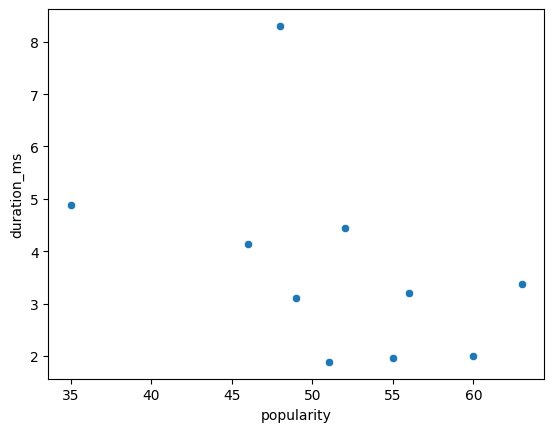

In [7]:
scatter_plot = sns.scatterplot(data = df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
